In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("flight_delays_train.csv")

In [3]:
df.dropna(inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


<ul>
<li>Month, DayofMonth, DayOfWeek</li>
<li>DepTime – departure time</li>
<li>UniqueCarrier – code of a company-career</li>
<li>Origin – flight origin</li>
<li>Dest – flight destination</li>
<li>Distance, distance between Origin and Dest airports </li>
<li>dep_delayed_15min – target</li>
</ul>

Limpio los datos de las fechas del dataframe y lo convierto a un int para poder operar

In [4]:
df['Month'] = df['Month'].apply(lambda x: x[2:])
df['DayofMonth'] = df['DayofMonth'].apply(lambda x: x[2:])
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: x[2:])

In [5]:
df['Month'] = df['Month'].astype(int)
df['DayofMonth'] = df['DayofMonth'].astype(int)
df['DayOfWeek'] = df['DayOfWeek'].astype(int)

Para poder contar los casos Donde se retrasa, cambio N e Y por booleanos

In [6]:
df.replace({"dep_delayed_15min": {"N":False , "Y":True}}, inplace=True)

In [7]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,False
1,4,20,3,1548,US,PIT,MCO,834,False
2,9,2,5,1422,XE,RDU,CLE,416,False
3,11,25,6,1015,OO,DEN,MEM,872,False
4,10,7,6,1828,WN,MDW,OMA,423,True
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,False
99996,1,18,3,804,CO,EWR,DAB,884,False
99997,1,24,2,1901,NW,DTW,IAH,1076,False
99998,4,27,4,1515,MQ,DFW,GGG,140,False


In [8]:
grouped = df.groupby("DayOfWeek").agg({"dep_delayed_15min": ["mean"]})

In [9]:
grouped

,dep_delayed_15min
,mean
DayOfWeek,
1,0.190404
2,0.167831
3,0.176937
4,0.211523
5,0.224125
6,0.167199
7,0.191885


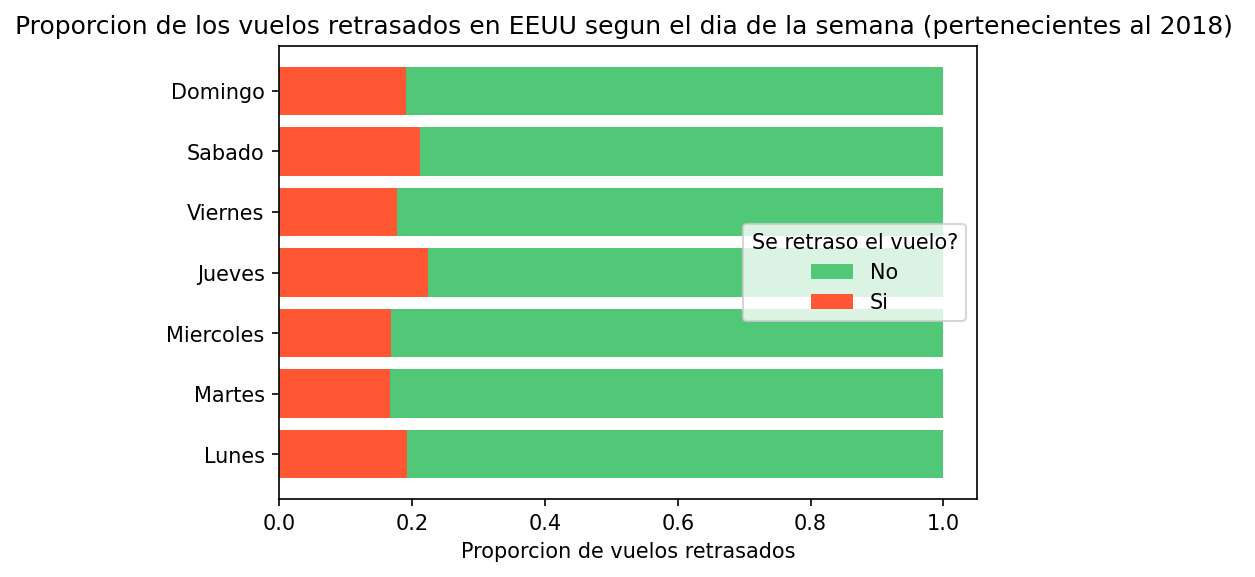

In [10]:
fig = plt.figure(dpi=150)
fig.patch.set_facecolor('xkcd:white')
plt.title("Proporcion de los vuelos retrasados en EEUU segun el dia de la semana (pertenecientes al 2018) ")
plt.xlabel("Proporcion de vuelos retrasados")
plt.barh(y=df["DayOfWeek"].unique(), width= [1]* len(df["DayOfWeek"].unique()), label="No", color = "#50C878")
plt.barh(y=df["DayOfWeek"].unique(), width = grouped[("dep_delayed_15min","mean")], label="Si", color= "#FF5733")
plt.yticks(ticks=[1,2,3,4,5,6,7],labels= ["Lunes", "Martes", "Miercoles", "Jueves" , "Viernes" , "Sabado" , "Domingo"])
plt.legend(title="Se retraso el vuelo?",loc=7)

In [11]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,False
1,4,20,3,1548,US,PIT,MCO,834,False
2,9,2,5,1422,XE,RDU,CLE,416,False
3,11,25,6,1015,OO,DEN,MEM,872,False
4,10,7,6,1828,WN,MDW,OMA,423,True
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,False
99996,1,18,3,804,CO,EWR,DAB,884,False
99997,1,24,2,1901,NW,DTW,IAH,1076,False
99998,4,27,4,1515,MQ,DFW,GGG,140,False


Resumen: No encontre la funcion que convierta DepTime a formato HHMM, proceido a hacerla por mi cuenta

Que quiero hacer? boxplot de True o false en el eje x, y haciendo un mean de todas las horas y minutos

In [12]:
def sumarCeros(x):
    return "0"*(4-len(x)) + x

In [13]:
df["DepTime"] = (df["DepTime"].astype(str)).apply(lambda x: sumarCeros(x))
df["DepTime"]

0        1934
1        1548
2        1422
3        1015
4        1828
         ... 
99995    1618
99996    0804
99997    1901
99998    1515
99999    1800
Name: DepTime, Length: 100000, dtype: object

Aca transfomo el formato HHMM a minutos, y saco algunas cargas donde se carga fechas del estilo 2514, las descarto

In [14]:
df["Hora"] = df["DepTime"].apply( lambda x: int(x[:2]) + int(x[2:])/60 if int(x[:2])<24 else None)

In [15]:
df["Hora"].describe()

count    99971.000000
mean        13.609199
std          4.759276
min          0.016667
25%          9.516667
50%         13.483333
75%         17.550000
max         23.983333
Name: Hora, dtype: float64

In [16]:
df.dropna(inplace=True)
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,Hora
0,8,21,7,1934,AA,ATL,DFW,732,False,19.566667
1,4,20,3,1548,US,PIT,MCO,834,False,15.800000
2,9,2,5,1422,XE,RDU,CLE,416,False,14.366667
3,11,25,6,1015,OO,DEN,MEM,872,False,10.250000
4,10,7,6,1828,WN,MDW,OMA,423,True,18.466667
...,...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,False,16.300000
99996,1,18,3,0804,CO,EWR,DAB,884,False,8.066667
99997,1,24,2,1901,NW,DTW,IAH,1076,False,19.016667
99998,4,27,4,1515,MQ,DFW,GGG,140,False,15.250000


Text(0.5, 0, '')

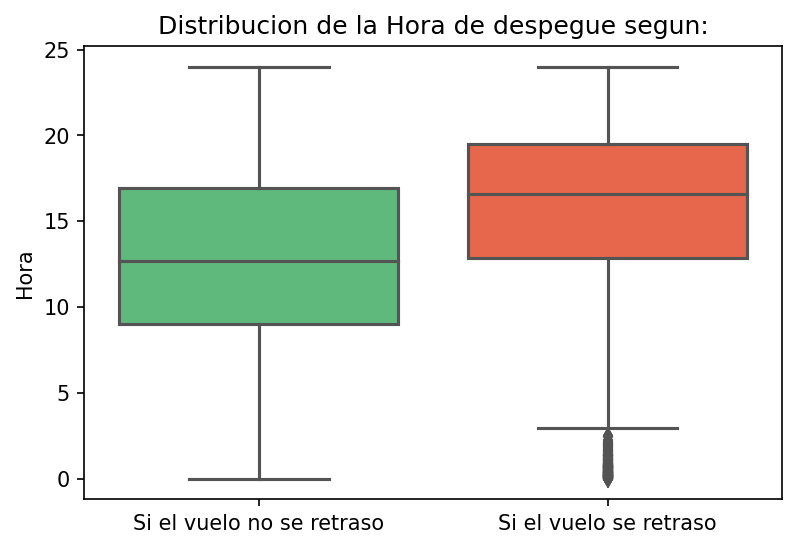

In [17]:
fig = plt.figure(dpi=150)
fig.patch.set_facecolor('xkcd:white')
plt.title("Distribucion de la Hora de despegue segun:")
sns.boxplot( x=df["dep_delayed_15min"], y=df["Hora"], palette=["#50C878","#FF5733"]);
plt.xticks(ticks=[False,True], labels=["Si el vuelo no se retraso", "Si el vuelo se retraso"])
plt.xlabel("")
